# **MNIST DATASET**

Es un dataset que representa dígitos escritos a mano. El objetivo es hacer un algoritmo que nos diga qué dígito está escrito en la imagen. Puedes ver más información [acá](https://https://en.wikipedia.org/wiki/MNIST_database)

![](https://conx.readthedocs.io/en/latest/_images/MNIST_8_0.png)

In [2]:
#Importamos las librerías tradicionales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#### Importamos nuestro datos.

En este caso, como los datos pesan mucho, se importará por partes para luego unirlos.

In [3]:
#Cuando trabajamos con imágenes, los datos suelven ser muy pesado. Entonces, importaremos por partes
train_1 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train1.csv')
train_2 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train2.csv')
train_3 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train3.csv')
train_4 = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/train4.csv')

test = pd.read_csv("https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/test.csv")

In [4]:
#Exploremos qué traen los datos
train_1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
7496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
7497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
train_2.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
count,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0,7500.0,7500.0,7500.0,7500.0,7500.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028933,0.067333,0.090933,0.092667,0.110267,0.125867,...,2.742933,1.831333,1.170000,0.599867,0.221733,0.035467,0.022133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006267,0.048933,0.051200,0.107467,0.255200,0.401867,0.447867,0.612667,0.795067,0.687733,0.558533,0.471867,0.312400,0.190800,0.119067,0.033733,0.002933,0.0,0.0,0.0,0.0,0.0,4.445467
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.812770,3.835131,4.296517,3.753695,4.819669,4.493720,...,22.935098,18.559397,15.211748,10.811581,6.364681,1.542247,1.355687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542709,3.204108,2.904864,4.447938,6.915503,9.179477,9.076203,11.086741,12.170073,11.193915,10.161158,9.434858,7.815439,6.083321,4.727043,2.224153,0.254034,0.0,0.0,0.0,0.0,0.0,2.884233
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
#Uniremos los datos de entrenamiento
train = pd.concat([train_1,train_2,train_3,train_4])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


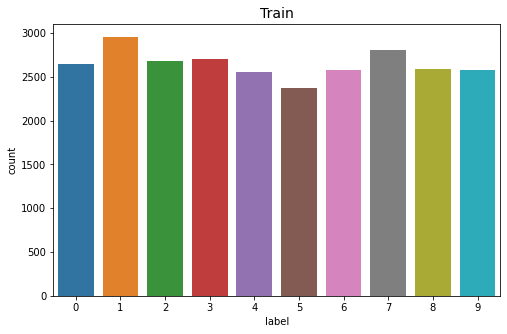

In [ ]:
#Exploramos la columnas label
plt.figure(figsize=(8,5))
plt.title('Train',fontsize=14)
sns.countplot(train['label'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


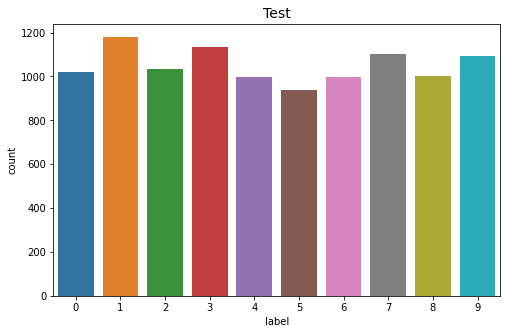

In [ ]:
#Exploramos la columna label pero para test
plt.figure(figsize=(8,5))
plt.title('Test',fontsize=14)
sns.countplot(test['label'])

In [ ]:
#Vamos a separar los pixeles de los labels (etiquetas de què número es)
x_train = train.drop('label',axis=1)
y_train = train['label']

x_test= test.drop('label',axis=1)
y_test=test['label']

In [ ]:
#Ponemos los valores como flotantes
x_train = (x_train.values).astype('float32')
y_train = y_train.values.astype('int32')
x_test = x_test.values.astype('float32')

In [ ]:
#Veamos la forma que tiene x_train
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#Acá, x_train tiene 26460 registros y train tiene 26460 filas con 785 columnas.
print('Para x_train:',len(x_train),'\nPara train',train.shape)

Para x_train: 26460 
Para train (26460, 785)


In [ ]:
train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Visualizando las imágenes

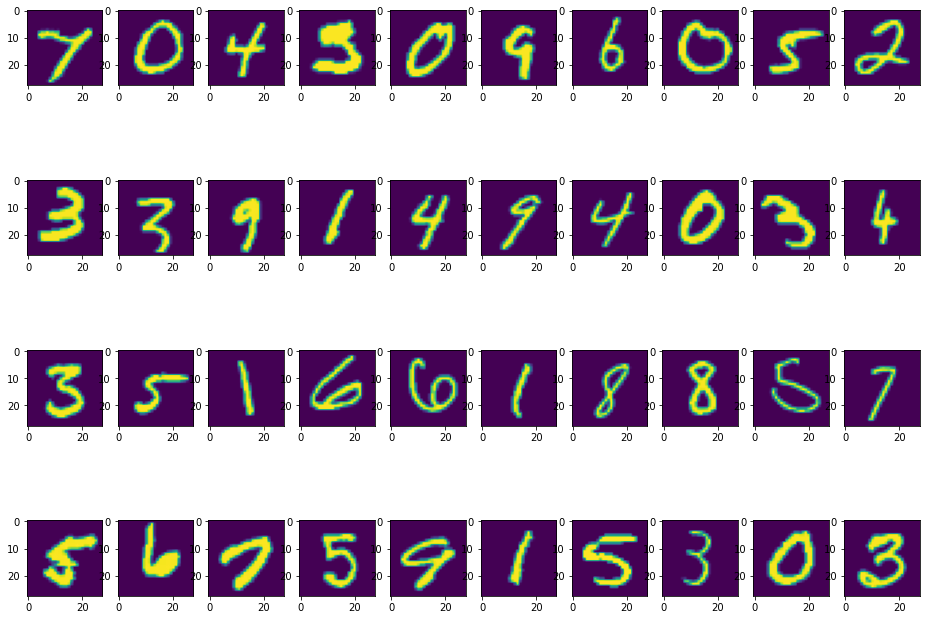

In [ ]:
#Podemos visualizar nuestras imágenes
plt.figure(figsize=(16,12))
x, y = 10, 4 #Defino las dimensiones

for i in range(40):
    plt.subplot(y,x,i+1)
    plt.imshow(x_train[i].reshape((28,28))) #reshape nos permite transformar las dimensiones de la imagen.

### Normalizando los datos

In [ ]:
x_train[0].max()

255.0

In [ ]:
#Como el valor máximo de los píxeles es 255. Lo dividiré para que ahora oscilen entre 0 y 1
x_train = x_train/255.0
#x_test = x_test/255.0

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Reshape

In [ ]:
x_train.shape

(26460, 784)

In [ ]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [ ]:
X_train.shape

(26460, 28, 28, 1)

### Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

Transformaremos nuestros datos y luego crearemos un X_train y X_test

In [ ]:
# Convertimos a los targets en vectores binarios (One hot encoding)
def to_categorical(y, num_classes):
  return np.eye(num_classes, dtype='uint8')[y]

y_train = to_categorical(y_train, 10)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [ ]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
batch_size = 64                                       #El número de ejemplos que van a ser propagados a través de la red.
num_classes = 10                                      #El número de clases que quiero predecir     
epochs = 20                                           #El número de épocas que quiero entrenar
input_shape = (28, 28, 1)                             #Las dimensiones del input

In [ ]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Nuestra primera red Neuronal con Keras
![](https://www.xeridia.com/sites/default/files/contenidos/blog/capas_neurona_artificial.jpg)

In [ ]:
#Defino mi modelo
model = Sequential()                                                            #Defino la clase de modelo.
#Le agrego los layers
model.add(Flatten(input_shape=input_shape))                                     #Flatten Layer 
#Le agrego un layer con 10 nodos 
model.add(Dense(10, activation='relu'))                                         #Hidden Layer 1
#Layer de 18 nodos                                          
model.add(Dense(18, activation='relu'))                                         #Hidden Layer 2
#Layer 128 nodos
model.add(Dense(128, activation='relu'))                                        #Hidden Layer 3                        
#Layer 128 nodos                                                                
model.add(Dense(128, activation='relu'))                                        #Hidden Layer 4                        
#Layer 128 nodos                                          
model.add(Dense(128,activation='relu'))                                         #Hidden Layer 5
#Layer Final, 10 outputs                                          
model.add(Dense(10, activation="softmax")) #La función de activación cambia.    #Output Layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 18)                198       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2432      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [ ]:
#Por qué me va a servir esto?
weights, biases = model.get_layer('dense_4').get_weights()
weights

array([[ 0.11120482,  0.03307167, -0.1263927 , ..., -0.12146865,
        -0.0364417 ,  0.03601427],
       [ 0.07431103, -0.1113161 ,  0.06224467, ..., -0.04881086,
         0.13219567, -0.11965988],
       [ 0.09537123, -0.08757196,  0.03813674, ...,  0.08082446,
         0.01585136, -0.01859297],
       ...,
       [-0.12935708,  0.08741768, -0.06198902, ..., -0.07461022,
        -0.00881766, -0.06035896],
       [-0.14850251, -0.10898983, -0.11983366, ..., -0.05735382,
         0.02636044, -0.02451879],
       [ 0.05923934,  0.07616079,  0.11491449, ..., -0.15217638,
         0.04006292, -0.1323589 ]], dtype=float32)

In [ ]:
#Compilo el modelo
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train, epochs=30, batch_size=batch_size,
                     validation_data=(X_valid, Y_valid))

Epoch 1/30
373/373 [==============================] - 1s 3ms/step - loss: 2.2268 - accuracy: 0.1807 - val_loss: 2.0172 - val_accuracy: 0.2661
Epoch 2/30
373/373 [==============================] - 1s 3ms/step - loss: 1.6038 - accuracy: 0.4395 - val_loss: 1.1636 - val_accuracy: 0.6327
Epoch 3/30
373/373 [==============================] - 1s 3ms/step - loss: 0.8503 - accuracy: 0.7355 - val_loss: 0.8401 - val_accuracy: 0.7109
Epoch 4/30
373/373 [==============================] - 1s 3ms/step - loss: 0.5752 - accuracy: 0.8220 - val_loss: 0.5117 - val_accuracy: 0.8428
Epoch 5/30
373/373 [==============================] - 1s 3ms/step - loss: 0.4841 - accuracy: 0.8513 - val_loss: 0.5017 - val_accuracy: 0.8469
Epoch 6/30
373/373 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.8660 - val_loss: 0.4082 - val_accuracy: 0.8794
Epoch 7/30
373/373 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8795 - val_loss: 0.3827 - val_accuracy: 0.8896
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 18)                198       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2432      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

#### Evaluando curvas de aprendizaje

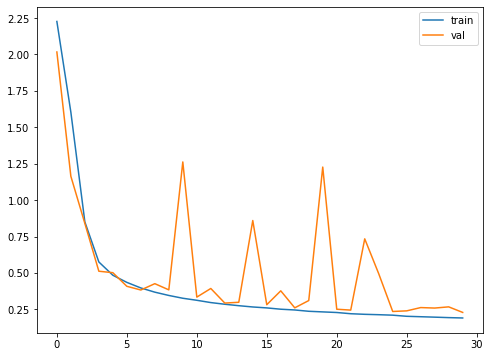

In [ ]:
__, train_acc = model.evaluate(X_train, Y_train, verbose=0)
__, test_acc = model.evaluate(X_valid, Y_valid, verbose = 0)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

### Entrenando otra Red Neuronal (Con Redes Convolucionales y DropOut)

![](https://miro.medium.com/max/3200/1*XEPeVUd1ePhcE1-MU_eWsg.png)


In [ ]:

modelo_2 = Sequential()

#Agregamos 2 layers Convolucionales, con 32 filtros, con una ventana 3x3 
modelo_2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) #CONV2D
modelo_2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) #CONV2D

modelo_2.add(MaxPool2D(2,2)) #Reducimos las dimensiones con MaxPool2D                   #MaxPool2D

#Agregamos una capa de Dropout. Donde dropearemos de manera random el 20%
modelo_2.add(Dropout(0.20))                                                             #DropOut

#Agregamos 2 layers Convolucionales, con 64 filtros,con una ventana 3x3
modelo_2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))                      #CONV2D
modelo_2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))                      #CONV2D

modelo_2.add(MaxPool2D(pool_size=(2,2)))                                                #MaxPool2D

#Agregamos un Dropout, ahora con 25%
modelo_2.add(Dropout(0.25))                                                             #DropOut

#Ahora que hemos hecho las Convolucionales. Haremos el Flatten.
modelo_2.add(Flatten())

#Agregamos los layers densos ahora
modelo_2.add(Dense(128,activation='relu'))                                              #Hidden Layer 1
modelo_2.add(BatchNormalization())                                                      #BatchNormalization

modelo_2.add(Dropout(0.25))                                                             #DropOut
modelo_2.add(Dense(num_classes, activation='softmax'))                                  #Output Layer

In [ ]:
#Compilamos el modelo.
modelo_2.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#Entrenamos el modelo. 
history = modelo_2.fit(X_train,Y_train, epochs=30, batch_size=batch_size,
                     validation_data=(X_valid, Y_valid))

Epoch 1/30
373/373 [==============================] - 2s 6ms/step - loss: 0.5878 - accuracy: 0.8231 - val_loss: 0.7084 - val_accuracy: 0.9426
Epoch 2/30
373/373 [==============================] - 2s 5ms/step - loss: 0.2140 - accuracy: 0.9418 - val_loss: 0.1780 - val_accuracy: 0.9512
Epoch 3/30
373/373 [==============================] - 2s 5ms/step - loss: 0.1528 - accuracy: 0.9575 - val_loss: 0.1282 - val_accuracy: 0.9652
Epoch 4/30
373/373 [==============================] - 2s 5ms/step - loss: 0.1290 - accuracy: 0.9633 - val_loss: 0.1115 - val_accuracy: 0.9649
Epoch 5/30
373/373 [==============================] - 2s 5ms/step - loss: 0.1107 - accuracy: 0.9688 - val_loss: 0.0618 - val_accuracy: 0.9803
Epoch 6/30
373/373 [==============================] - 2s 5ms/step - loss: 0.0985 - accuracy: 0.9697 - val_loss: 0.0663 - val_accuracy: 0.9819
Epoch 7/30
373/373 [==============================] - 2s 5ms/step - loss: 0.0885 - accuracy: 0.9749 - val_loss: 0.0612 - val_accuracy: 0.9788
Epoch 

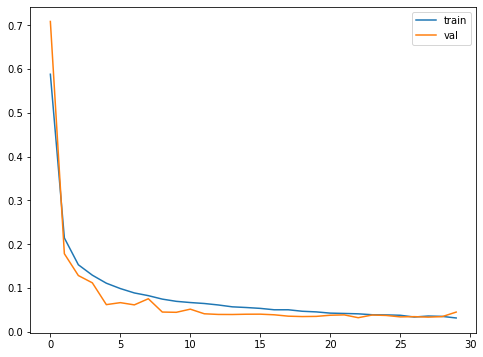

In [ ]:
__, train_acc = modelo_2.evaluate(X_train, Y_train, verbose=0)
__, test_acc = modelo_2.evaluate(X_valid, Y_valid, verbose = 0)

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

En algunas casos las curvas de aprendizaje nos dicen que hay un problema. Los errores pueden ser grandes durante las épocas y no estables. A pesar de que el accuracy nos salga 98% el problema no es de la estructura de la red. Sino, de los datos. Se necesitan más datos. 

Existen métodos de ampliación de datos, pero eso ya lo veremos en otro curso...